In [62]:
from qiskit import Aer
from qiskit.aqua.algorithms import Shor, Grover
from qiskit.aqua.components.oracles import TruthTableOracle, LogicalExpressionOracle
from qiskit.visualization import plot_histogram
import qiskit

## Shor

In [71]:
N=21

In [72]:
shor=Shor(N)

In [73]:
backend = Aer.get_backend('qasm_simulator')
result = shor.run(backend)
print("The factors of {} computed by the Shor's algorithm: {}.".format(N, result['factors'][0]))

The factors of 21 computed by the Shor's algorithm: [3, 7].


In [ ]:
circuit = shor.construct_circuit(True)
circuit.draw()

## Grover

In [79]:
truthtable = '0000000000000010'
oracle = TruthTableOracle(truthtable)

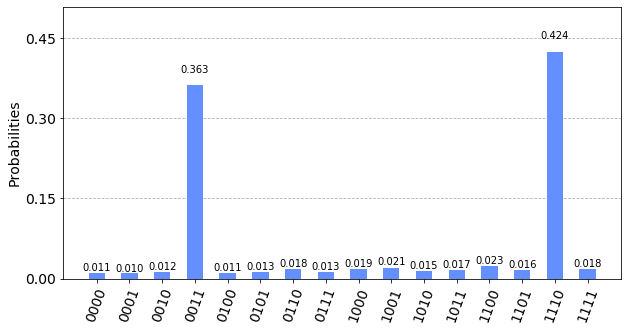

In [80]:
grover = Grover(oracle)
result = grover.run(backend)
plot_histogram(result['measurement'], figsize=(10,5))

In [83]:
# A logical expression is composed of logical operators & (AND), | (OR), ~ (NOT), and ^ (XOR), 
# as well as symbols for literals (variables).
# For example: 
#    ‘a & b’, 
#    (v0 | ~v1) ^ (~v2 & v3)

oracle2 = LogicalExpressionOracle('~a & ~b | ~c & ~d | e')

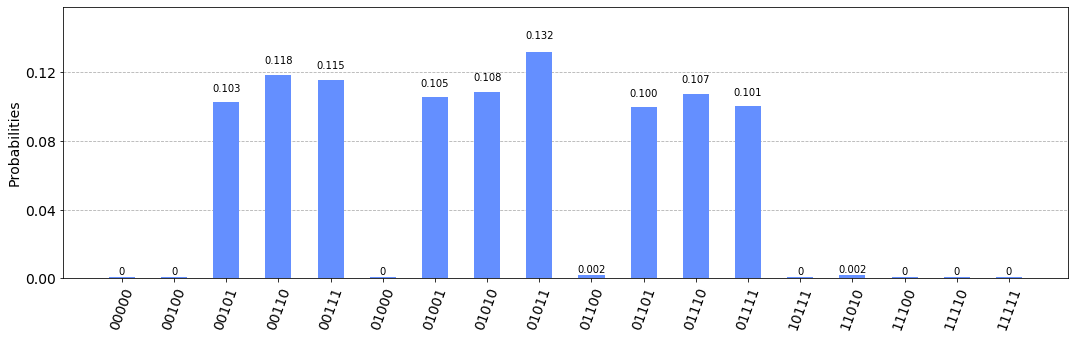

In [84]:
grover = Grover(oracle2)
result = grover.run(backend)
plot_histogram(result['measurement'], figsize=(18,5))